## Forecasting Model Assignment:
    
### Forecast the Airlines+Data dataset. Prepare a document for model explaining how many dummy variables you have created and RMSE value for model. Finally which model you will use for Forecasting.

### Forecasting number of Air Passengers for next 10 years

# 1. Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime

import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

# 2. Import Dataset / Data:

In [3]:
airlines = pd.read_excel('Airlines+Data.xlsx')
airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


# 3. Data Understanding / EDA:

## 3.1 Descriptive Analysis:

In [4]:
airlines.shape

(96, 2)

In [5]:
airlines.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [8]:
airlines.nunique()

Month         96
Passengers    80
dtype: int64

In [9]:
airlines[airlines.duplicated()].shape

(0, 2)

In [10]:
airlines[airlines.duplicated()]

,Month,Passengers


In [11]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


### Converting the 'Month' column into proper date time format:

In [17]:
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(airlines))

In [21]:
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01', '1949-11-01', '1949-12-01',
               '1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01', '1950-11-01', '1950-12-01',
               '1951-01-01', '1951-02-01', '1951-03-01', '1951-04-01',
               '1951-05-01', '1951-06-01', '1951-07-01', '1951-08-01',
               '1951-09-01', '1951-10-01', '1951-11-01', '1951-12-01',
               '1952-01-01', '1952-02-01', '1952-03-01', '1952-04-01',
               '1952-05-01', '1952-06-01', '1952-07-01', '1952-08-01',
               '1952-09-01', '1952-10-01', '1952-11-01', '1952-12-01',
               '1953-01-01', '1953-02-01', '1953-03-01', '1953-04-01',
               '1953-05-01', '1953-06-01', '1953-07-01', '1953-08-01',
      

In [22]:
airlines['Month'] = dates.month
airlines['Year'] = dates.year

In [23]:
airlines.head()

,Month,Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949


In [24]:
airlines.shape

(96, 3)

In [25]:
airlines.dtypes

Month         int64
Passengers    int64
Year          int64
dtype: object

In [26]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Month       96 non-null     int64
 1   Passengers  96 non-null     int64
 2   Year        96 non-null     int64
dtypes: int64(3)
memory usage: 2.4 KB


In [27]:
airlines.isnull().sum()

Month         0
Passengers    0
Year          0
dtype: int64

In [28]:
airlines.nunique()

Month         12
Passengers    80
Year           8
dtype: int64

In [29]:
airlines[airlines.duplicated()].shape

(0, 3)

In [30]:
airlines[airlines.duplicated()]

,Month,Passengers,Year


In [31]:
airlines.describe()

,Month,Passengers,Year
count,96.000000,96.000000,96.000000
mean,6.500000,213.708333,1952.500000
std,3.470174,71.918216,2.303316
min,1.000000,104.000000,1949.000000
25%,3.750000,156.000000,1950.750000
50%,6.500000,200.000000,1952.500000
75%,9.250000,264.750000,1954.250000
max,12.000000,413.000000,1956.000000


In [33]:
import calendar
airlines['Month'] = airlines['Month'].apply(lambda x: calendar.month_abbr[x])
airlines.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
airlines = airlines[['Month','Year','Passengers']]

In [34]:
airlines.head()

,Month,Year,Passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121


In [35]:
airlines['Date'] = dates
airlines.set_index('Date',inplace=True)

In [36]:
airlines.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


## 3.2 Exploratory Data Analysis:

### Visualizing Time Series plot for the number of Air Passengers:

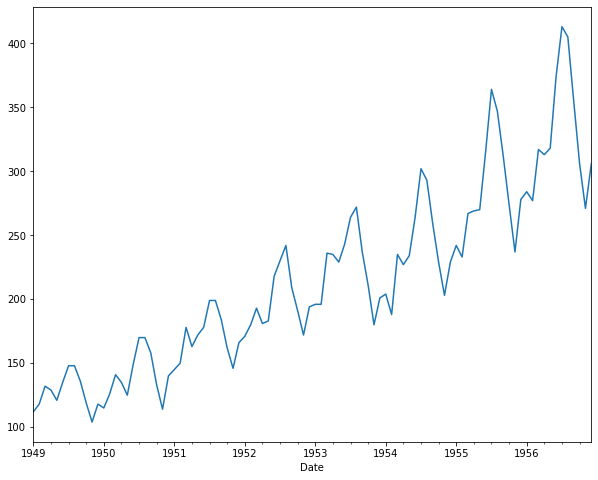

In [38]:
airlines.Passengers.plot()
plt.show()

In [44]:
passengers_count = airlines['Passengers']

In [45]:
decompose = sm.tsa.seasonal_decompose(passengers_count,model='multiplicative',extrapolate_trend=8)

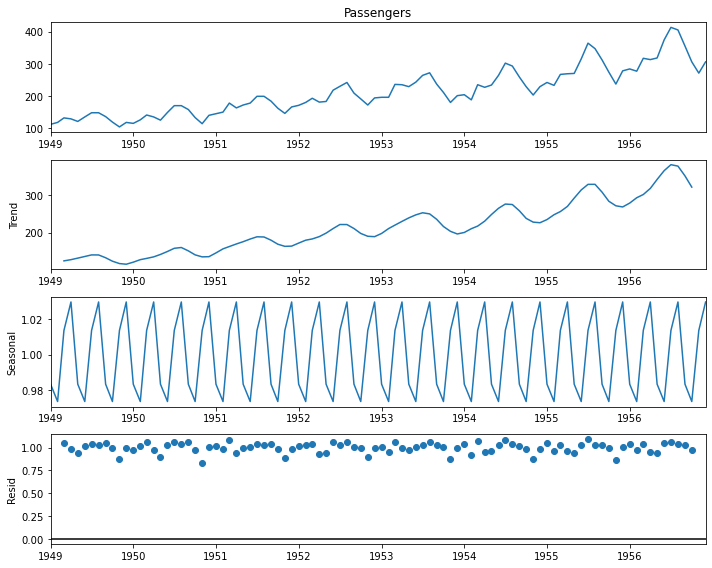

In [46]:
plt.rcParams['figure.figsize'] = 10,8
decomposition =seasonal_decompose(airlines.Passengers, model='mul', period= 4) # Additive Seasonal Index:
decomposition.plot()
plt.show()

### Trend:

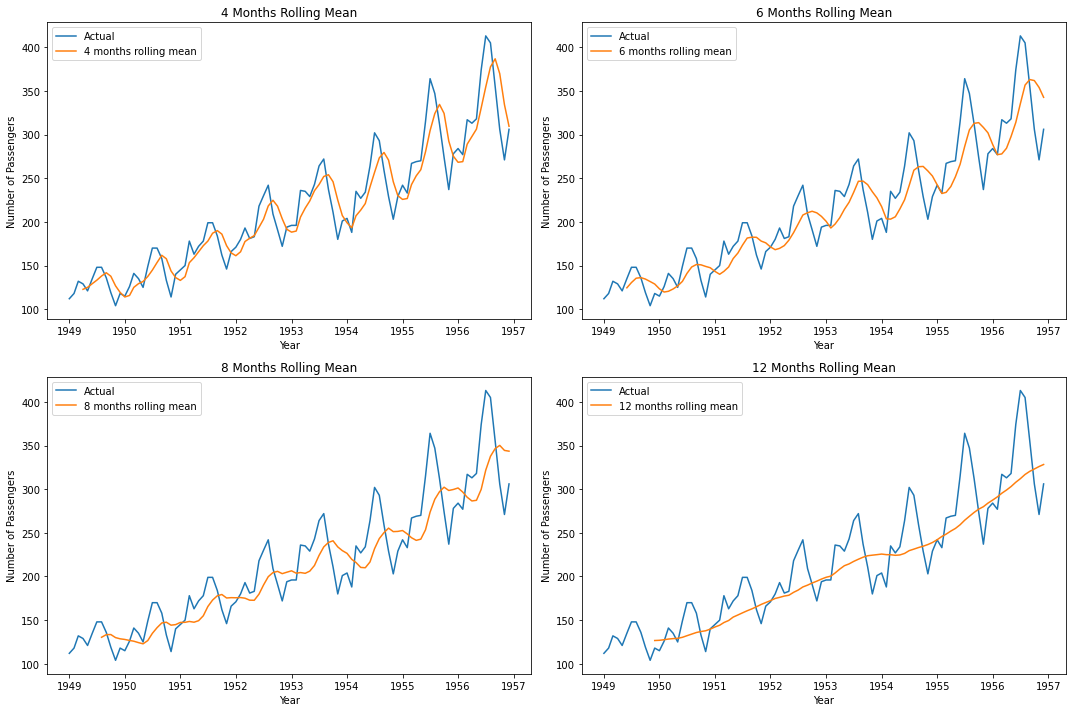

In [47]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(airlines.index,passengers_count,label='Actual')
axes[0][0].plot(airlines.index,passengers_count.rolling(window=4).mean(),label='4 months rolling mean')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('4 Months Rolling Mean')
axes[0][0].legend(loc='best')


axes[0][1].plot(airlines.index,passengers_count,label='Actual')
axes[0][1].plot(airlines.index,passengers_count.rolling(window=6).mean(),label='6 months rolling mean')
axes[0][1].set_xlabel('Year')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('6 Months Rolling Mean')
axes[0][1].legend(loc='best')



axes[1][0].plot(airlines.index,passengers_count,label='Actual')
axes[1][0].plot(airlines.index,passengers_count.rolling(window=8).mean(),label='8 months rolling mean')
axes[1][0].set_xlabel('Year')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('8 Months Rolling Mean')
axes[1][0].legend(loc='best')


axes[1][1].plot(airlines.index,passengers_count,label='Actual')
axes[1][1].plot(airlines.index,passengers_count.rolling(window=12).mean(),label='12 months rolling mean')
axes[1][1].set_xlabel('Year')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('12 Months Rolling Mean')
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

### Seasonality:

In [48]:
airlines.head()

,Month,Year,Passengers
Date,,,
1949-01-01,Jan,1949,112
1949-02-01,Feb,1949,118
1949-03-01,Mar,1949,132
1949-04-01,Apr,1949,129
1949-05-01,May,1949,121


In [49]:
monthly = pd.pivot_table(data=airlines,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [50]:
monthly

Year,1949,1950,1951,1952,1953,1954,1955,1956
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


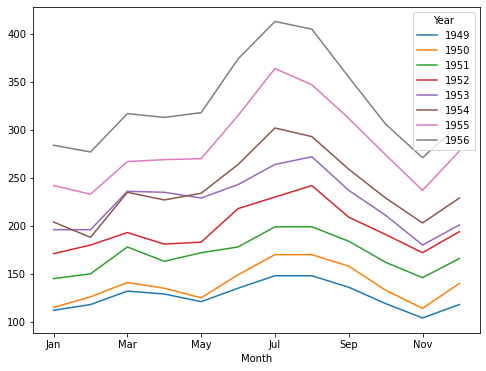

In [51]:
monthly.plot(figsize=(8,6))
plt.show()

In [52]:
yearly = pd.pivot_table(data=airlines,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [53]:
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306


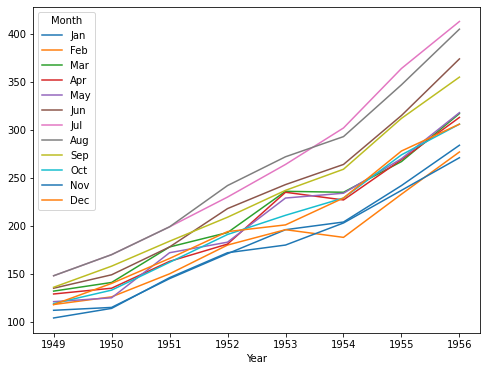

In [54]:
yearly.plot(figsize=(8,6))
plt.show()

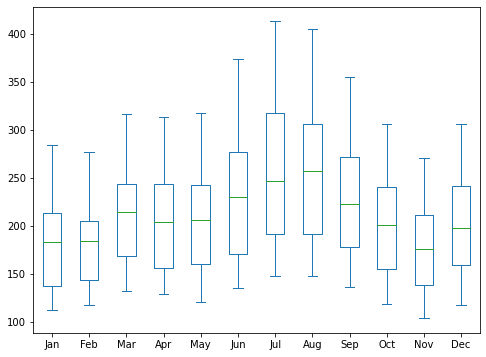

In [55]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

**Important Inferences:**

1. The passengers are increasing without fail every year.

2. July and August are the peak months for passengers.

3. We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 month.

# 4. ARIMA Modelling:

### Dickey-Fuller Test:  ADF (Augmented Dickey-Fuller Test)

The most important assumption of auto regressive method is that the TS data should be stationary.

Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary

**Null hypothesis - Time Series is non-stationary**

In [56]:
from statsmodels.tsa.stattools import adfuller

In [58]:
adfuller(passengers_count)

(1.340247959646706,
 0.9968250481137263,
 12,
 83,
 {'1%': -3.5117123057187376,
  '5%': -2.8970475206326833,
  '10%': -2.5857126912469153},
 626.0084713813505)

In [57]:
print('Dickey-Fuller Test: ')
dftest=adfuller(airlines['Passengers'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           1.340248
p-value                  0.996825
Lags Used               12.000000
No. of Obs              83.000000
Critical Value (1%)     -3.511712
Critical Value (5%)     -2.897048
Critical Value (10%)    -2.585713
dtype: float64


#### The p-value is greater than 0.05 (Coinfidence Interval 95%)

1. From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

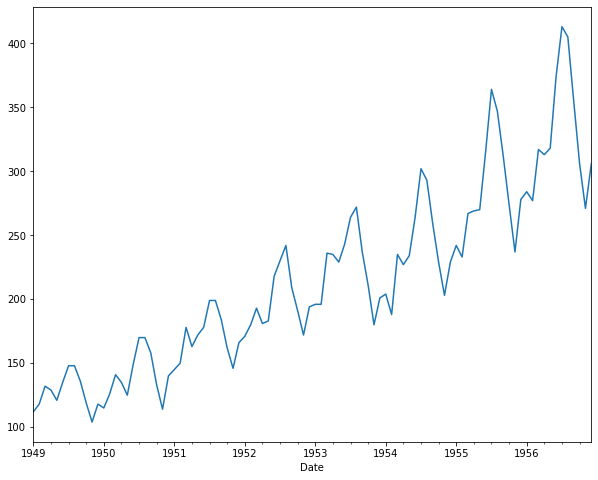

In [61]:
passengers_count.plot()
plt.show()

### Below we took log transformation to make our Time series stationary and plotted visual for it.
### We found graph upward trending over time with seasonality.
### Let's do log transformation to convert the TS to stationary TS.

In [62]:
passengers_log = np.log10(passengers_count)

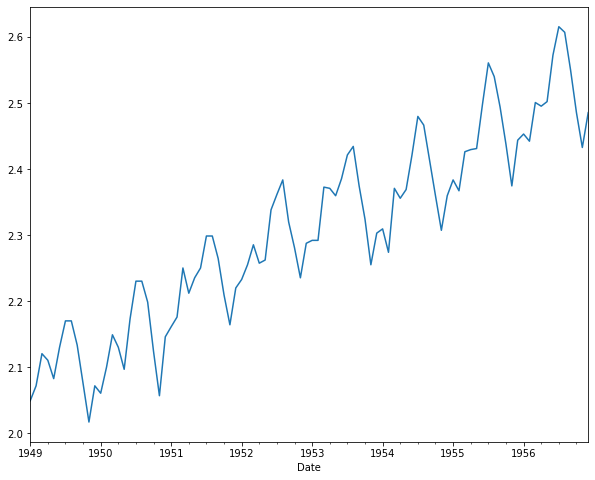

In [63]:
passengers_log.plot()
plt.show()

In [64]:
# Perform Dickey-Fuller Test:

adfuller(passengers_log)
adfuller_results = pd.Series(adfuller(passengers_log)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(passengers_log)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -0.723027
p-value                    0.840695
lags used                 12.000000
Number of observations    83.000000
Critical Value (1%)       -3.511712
Critical Value (5%)       -2.897048
Critical Value (10%)      -2.585713
dtype: float64


1. The p-value is still greater than 0.05 (Coinfidence Interval 95%).
2. The log transformation has made variance stationary but mean is still increasing.
3. Let's try differencing by 1.

In [65]:
diff1 = passengers_count.diff(1)
diff1.head()

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
Name: Passengers, dtype: float64

In [66]:
diff1.dropna(axis=0,inplace=True)

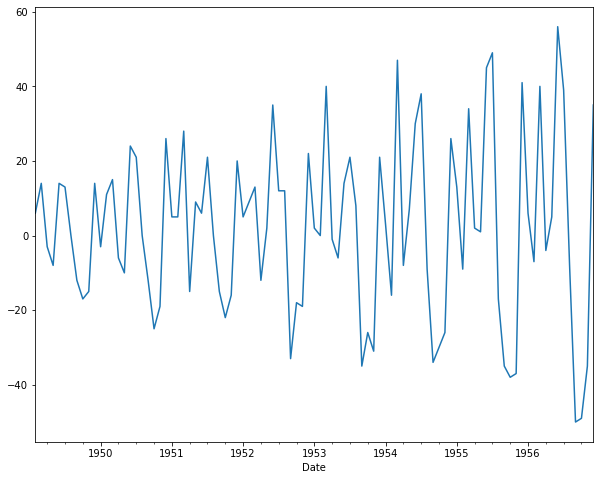

In [67]:
diff1.plot()
plt.show()

In [68]:
# Perform Dickey-Fuller Test:

adfuller(diff1)
adfuller_results = pd.Series(adfuller(diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.150002
p-value                    0.224889
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


1. The p-value is still greater than 0.05 (Coinfidence Interval 95%).
2. The differencing by 1 has made mean stationary but variance is changing.
3. Let's try differencing by 1 on the log transformation.

In [69]:
log_diff1 = passengers_log.diff(1)
log_diff1.head()

Date
1949-01-01         NaN
1949-02-01    0.022664
1949-03-01    0.048692
1949-04-01   -0.009984
1949-05-01   -0.027804
Name: Passengers, dtype: float64

In [70]:
log_diff1.dropna(axis=0,inplace=True)

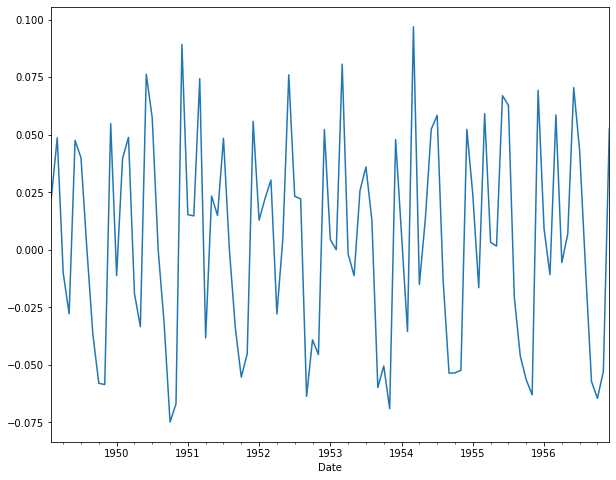

In [71]:
log_diff1.plot()
plt.show()

In [72]:
# Perform Dickey-Fuller Test:

adfuller(log_diff1)
adfuller_results = pd.Series(adfuller(log_diff1)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff1)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.670823
p-value                    0.079225
lags used                 12.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


In [73]:
log_diff2 = passengers_log.diff(2)
log_diff2.head()

Date
1949-01-01         NaN
1949-02-01         NaN
1949-03-01    0.071356
1949-04-01    0.038708
1949-05-01   -0.037789
Name: Passengers, dtype: float64

In [74]:
log_diff2.dropna(axis=0,inplace=True)

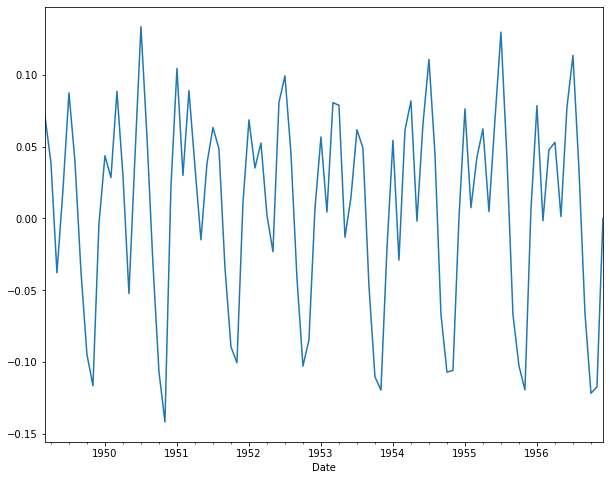

In [75]:
log_diff2.plot()
plt.show()

In [76]:
# Perform Dickey-Fuller Test:

adfuller(log_diff2)
adfuller_results = pd.Series(adfuller(log_diff2)[:4],index=['T stats','p-value','lags used','Number of observations'])
for key,value in adfuller(log_diff2)[4].items():
    adfuller_results['Critical Value (%s)'%key] = value
print(adfuller_results)

T stats                   -2.787629
p-value                    0.060063
lags used                 11.000000
Number of observations    82.000000
Critical Value (1%)       -3.512738
Critical Value (5%)       -2.897490
Critical Value (10%)      -2.585949
dtype: float64


#### p-value is less than 0.05. In this case we reject null hypothesis that TS is non stationary.

## Identification of best fit ARIMA model:

Iterate the process to find the best values for p, d, q and P, D, Q

In [94]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2:

p = q = range(0, 3)
d = range(0,1)

# Generate all different combinations of p, d and q triplets:

pdq = list(itertools.product(p, d, q))

In [95]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [96]:
# Generate all different combinations of seasonal p, q and q triplets:

D = range(0,3)
P = Q = range(0, 3) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [97]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 0, 2, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (0, 1, 2, 12),
 (0, 2, 0, 12),
 (0, 2, 1, 12),
 (0, 2, 2, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 2, 0, 12),
 (1, 2, 1, 12),
 (1, 2, 2, 12),
 (2, 0, 0, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 1, 0, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 2, 0, 12),
 (2, 2, 1, 12),
 (2, 2, 2, 12)]

In [99]:
import sys

In [98]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        try:
            temp_model = sm.tsa.statespace.SARIMAX(log_diff2,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

           # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic)):
        
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            # print("Unexpected error:", sys.exc_info()[0]):
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-401.14131903696375


**Best SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 model - AIC:-671.0386830029513 The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.**

### Predict sales on in-sample date using the best fit ARIMA model:
The next step is to predict passengers for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [100]:
sarima = sm.tsa.statespace.SARIMAX(log_diff2,order=(1,0,1),seasonal_order=(1,0,1,12),enforce_invertibility=False,enforce_stationarity=False)

In [101]:
sarima_results = sarima.fit()

In [102]:
print(sarima_results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                   94
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 205.571
Date:                            Thu, 10 Nov 2022   AIC                           -401.141
Time:                                    23:08:45   BIC                           -389.231
Sample:                                03-01-1949   HQIC                          -396.366
                                     - 12-01-1956                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3152      0.118     -2.674      0.007      -0.546      -0.084
ma.L1          1.0001     46.868   

In [103]:
passengers_count.tail(15)

Date
1955-10-01    274
1955-11-01    237
1955-12-01    278
1956-01-01    284
1956-02-01    277
1956-03-01    317
1956-04-01    313
1956-05-01    318
1956-06-01    374
1956-07-01    413
1956-08-01    405
1956-09-01    355
1956-10-01    306
1956-11-01    271
1956-12-01    306
Name: Passengers, dtype: int64

In [104]:
prediction = sarima_results.get_prediction(start=pd.to_datetime('1960-01-01'),full_results=True)

In [105]:
prediction.predicted_mean

1960-01-01    0.069698
Freq: MS, dtype: float64

In [106]:
predicted_values = np.power(10,prediction.predicted_mean)

In [107]:
predicted_values

1960-01-01    1.174081
Freq: MS, dtype: float64

In [108]:
actual = passengers_count['1960-01-01':]

In [109]:
actual

Series([], Name: Passengers, dtype: int64)

In [110]:
# Mean absolute percentage error:

mape = np.mean(np.abs(actual - predicted_values)/actual)
mape

nan

In [111]:
# Mean square error:

mse = np.mean((actual - predicted_values) ** 2)
mse

nan

### Forecast sales using the best fit ARIMA model:
The next step is to foercast passengers for next 3 years i.e. for 1961, 1962, and 1963 through the above model.

In [112]:
# Get forecast 36 steps (3 years) ahead in future:

n_steps = 36
pred_uc_99 = sarima_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = sarima_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts:

pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [113]:
pred_ci_99.head()

,lower Passengers,upper Passengers
1957-01-01,0.034234,0.102565
1957-02-01,-0.038545,0.043517
1957-03-01,0.012613,0.095916
1957-04-01,0.015624,0.099039
1957-05-01,-0.045411,0.038010


In [114]:
pred_ci_95.head()

,lower Passengers,upper Passengers
1957-01-01,0.034234,0.102565
1957-02-01,-0.038545,0.043517
1957-03-01,0.012613,0.095916
1957-04-01,0.015624,0.099039
1957-05-01,-0.045411,0.038010


In [115]:
n_steps = 36
idx = pd.date_range(passengers_count.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [116]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
1956-12-01,1.170575,1.082017,1.266382
1957-01-01,1.005741,0.915072,1.105395
1957-02-01,1.133090,1.029468,1.247141
1957-03-01,1.141121,1.036631,1.256143
1957-04-01,0.991516,0.900719,1.091466


In [117]:
fc_99.head()

,lower_ci_99,upper_ci_99
1956-12-01,1.082017,1.266382
1957-01-01,0.915072,1.105395
1957-02-01,1.029468,1.247141
1957-03-01,1.036631,1.256143
1957-04-01,0.900719,1.091466


In [118]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
1956-12-01,1.170575,1.082017,1.266382,1.082017,1.266382
1957-01-01,1.005741,0.915072,1.105395,0.915072,1.105395
1957-02-01,1.133090,1.029468,1.247141,1.029468,1.247141
1957-03-01,1.141121,1.036631,1.256143,1.036631,1.256143
1957-04-01,0.991516,0.900719,1.091466,0.900719,1.091466


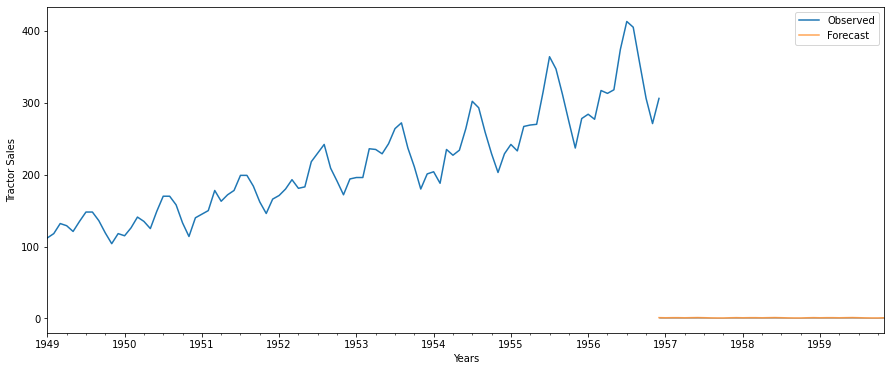

In [119]:
# plot the forecast along with the confidence band:

axis = passengers_count.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)

# axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25):

axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

### Diagnostics:
    
1. Errors follows normality.
2. Errors should not have auto correlation (ACF, no spikes beyond the limits).
3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly).

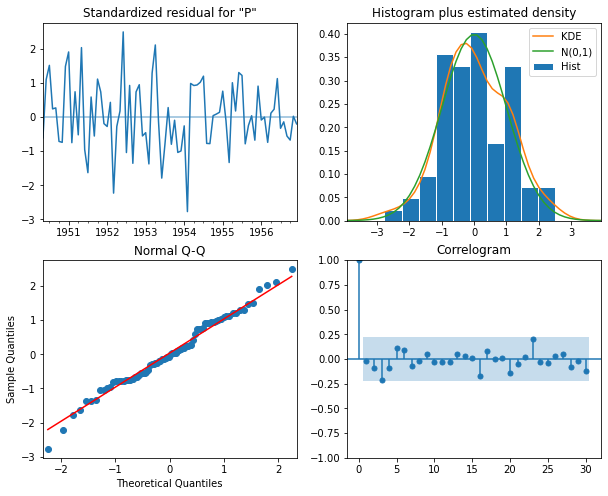

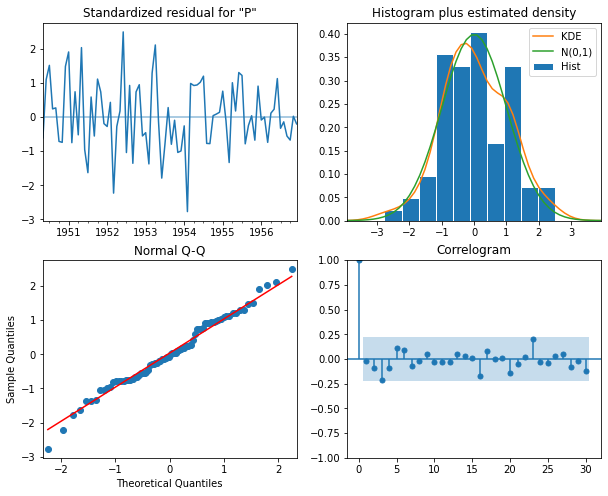

In [120]:
sarima_results.plot_diagnostics(lags=30,figsize=(10,8))

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. 
4. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.